# 0. 필요한 라이브러리

In [1]:
# 데이터프레임 관련
import pandas as pd

# 선형대수 관련
import numpy as np

# 시각화 관련
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 전처리 관련
from sklearn import preprocessing

# 모델 관련
from sklearn.ensemble import RandomForestClassifier

# 경고 무시
import warnings
warnings.filterwarnings('ignore')

# 1. 데이터 준비하기

In [2]:
# 데이터 불러오기
train = pd.read_csv('C:/Users/USER/DACON/creditcard/train.csv')
test = pd.read_csv('C:/Users/USER/DACON/creditcard/test.csv')
sample_submission = pd.read_csv('C:/Users/USER/DACON/creditcard/sample_submission.csv')

## train data 확인

In [3]:
# 상위 5개 관측 확인; head()
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [4]:
# 데이터 차원 확인; shape
train.shape

(26457, 20)

In [5]:
# 데이터 정보 확인; info()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
index            26457 non-null int64
gender           26457 non-null object
car              26457 non-null object
reality          26457 non-null object
child_num        26457 non-null int64
income_total     26457 non-null float64
income_type      26457 non-null object
edu_type         26457 non-null object
family_type      26457 non-null object
house_type       26457 non-null object
DAYS_BIRTH       26457 non-null int64
DAYS_EMPLOYED    26457 non-null int64
FLAG_MOBIL       26457 non-null int64
work_phone       26457 non-null int64
phone            26457 non-null int64
email            26457 non-null int64
occyp_type       18286 non-null object
family_size      26457 non-null float64
begin_month      26457 non-null float64
credit           26457 non-null float64
dtypes: float64(4), int64(8), object(8)
memory usage: 4.0+ MB


## test data 확인

In [6]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [7]:
test.shape # 20 -> 19; 종속변수 X

(10000, 19)

In [8]:
test.info() # 종속변수; 'credit'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
index            10000 non-null int64
gender           10000 non-null object
car              10000 non-null object
reality          10000 non-null object
child_num        10000 non-null int64
income_total     10000 non-null float64
income_type      10000 non-null object
edu_type         10000 non-null object
family_type      10000 non-null object
house_type       10000 non-null object
DAYS_BIRTH       10000 non-null int64
DAYS_EMPLOYED    10000 non-null int64
FLAG_MOBIL       10000 non-null int64
work_phone       10000 non-null int64
phone            10000 non-null int64
email            10000 non-null int64
occyp_type       6848 non-null object
family_size      10000 non-null float64
begin_month      10000 non-null float64
dtypes: float64(3), int64(8), object(8)
memory usage: 1.4+ MB


## 데이터 합치기

In [9]:
# 데이터 합치기; 데이터 전처리를 위해서
data = pd.concat([train, test], axis=0)

# data = train + test
# axis=0; 세로로 붙이기
# axis=1; 가로로 붙이기

## 결측값 처리

In [10]:
# 결측값 확인
data.isnull().sum()

DAYS_BIRTH           0
DAYS_EMPLOYED        0
FLAG_MOBIL           0
begin_month          0
car                  0
child_num            0
credit           10000
edu_type             0
email                0
family_size          0
family_type          0
gender               0
house_type           0
income_total         0
income_type          0
index                0
occyp_type       11323
phone                0
reality              0
work_phone           0
dtype: int64

In [11]:
# 열 버리기; drop
data = data.drop('occyp_type', axis=1, inplace=False)

# 'occyp_type'; 결측값이 너무 많으므로 변수에서 제거
# *결측값 대체 등 다른 처리 방법도 고려할 수 있을 듯

# axis=0; 행 제거
# axis=1; 열 제거

# inplace=True; 기존 DF 자체가 변화(update)  
# inplace=False; 기존 DF 그대로, 새로운 객체에 담아주어야 함

In [12]:
data.isnull().sum()

DAYS_BIRTH           0
DAYS_EMPLOYED        0
FLAG_MOBIL           0
begin_month          0
car                  0
child_num            0
credit           10000
edu_type             0
email                0
family_size          0
family_type          0
gender               0
house_type           0
income_total         0
income_type          0
index                0
phone                0
reality              0
work_phone           0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 9999
Data columns (total 19 columns):
DAYS_BIRTH       36457 non-null int64
DAYS_EMPLOYED    36457 non-null int64
FLAG_MOBIL       36457 non-null int64
begin_month      36457 non-null float64
car              36457 non-null object
child_num        36457 non-null int64
credit           26457 non-null float64
edu_type         36457 non-null object
email            36457 non-null int64
family_size      36457 non-null float64
family_type      36457 non-null object
gender           36457 non-null object
house_type       36457 non-null object
income_total     36457 non-null float64
income_type      36457 non-null object
index            36457 non-null int64
phone            36457 non-null int64
reality          36457 non-null object
work_phone       36457 non-null int64
dtypes: float64(4), int64(8), object(7)
memory usage: 5.6+ MB


## unique value 개수 확인

In [14]:
# 'gender'의 unique value 개수 확인
len(data['gender'].unique())

2

In [15]:
# or
data['gender'].nunique() # 단, NA는 count 하지않음 

2

In [16]:
# 전체 변수의 unique value 개수 확인
unique_len = data.apply(lambda x: x.nunique())
unique_len

DAYS_BIRTH        7183
DAYS_EMPLOYED     3640
FLAG_MOBIL           1
begin_month         61
car                  2
child_num            9
credit               3
edu_type             5
email                2
family_size         10
family_type          5
gender               2
house_type           6
income_total       265
income_type          5
index            36457
phone                2
reality              2
work_phone           2
dtype: int64

## unique value 개수에 따른 그룹화

In [17]:
# group1; 2개 이하
group1 = unique_len[unique_len<=2].index
group1

Index(['FLAG_MOBIL', 'car', 'email', 'gender', 'phone', 'reality',
       'work_phone'],
      dtype='object')

In [18]:
# *group2; 2개 초과 10개 이하
group2 = unique_len[unique_len>2][unique_len<=10].index
group2

Index(['child_num', 'credit', 'edu_type', 'family_size', 'family_type',
       'house_type', 'income_type'],
      dtype='object')

In [19]:
# group3; 10개 초과
group3 = unique_len[unique_len>10].index
group3

Index(['DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month', 'income_total', 'index'], dtype='object')

In [20]:
data[group1].head()

,FLAG_MOBIL,car,email,gender,phone,reality,work_phone
0,1,N,0,F,0,N,0
1,1,N,1,F,0,Y,0
2,1,Y,0,M,1,Y,0
3,1,N,0,F,1,Y,0
4,1,Y,0,F,0,Y,0


## 데이터 인코딩 - group1

In [21]:
# 범주형 변수; 'gender', 'car', 'reality'
data[group1].head()

,FLAG_MOBIL,car,email,gender,phone,reality,work_phone
0,1,N,0,F,0,N,0
1,1,N,1,F,0,Y,0
2,1,Y,0,M,1,Y,0
3,1,N,0,F,1,Y,0
4,1,Y,0,F,0,Y,0


### gender

In [22]:
# 범주형; F, M
data['gender'].unique()

array(['F', 'M'], dtype=object)

In [23]:
# F, M 으로 이루어짐
data['gender'].head()

0    F
1    F
2    M
3    F
4    F
Name: gender, dtype: object

In [24]:
# 데이터 대체; replace
data['gender'] = data['gender'].replace(['F','M'], [0,1])

# 'F' -> 0, 'M' -> 1
# *LabelEncoding, OneHotEncoding 등 다른 인코딩 방법도 고려 

In [25]:
# 수치형; 0, 1
data['gender'].unique()

array([0, 1], dtype=int64)

In [26]:
# 0, 1로 이루어짐
data['gender'].head()

0    0
1    0
2    1
3    0
4    0
Name: gender, dtype: int64

### car

In [27]:
data['car'].unique()

array(['N', 'Y'], dtype=object)

In [28]:
data['car'] = data['car'].replace(['N','Y'], [0,1])

In [29]:
data['car'].head()

0    0
1    0
2    1
3    0
4    1
Name: car, dtype: int64

### reality

In [30]:
data['reality'].unique()

array(['N', 'Y'], dtype=object)

In [31]:
data['reality'] = data['reality'].replace(['N','Y'], [0,1])

In [32]:
data['reality'].head()

0    0
1    1
2    1
3    1
4    1
Name: reality, dtype: int64

## 데이터 인코딩 - group2

In [33]:
# 범주형 변수; 'edu_type', 'family_type', 'house_type', income_type'
data[group2].head()

,child_num,credit,edu_type,family_size,family_type,house_type,income_type
0,0,1.0,Higher education,2.0,Married,Municipal apartment,Commercial associate
1,1,1.0,Secondary / secondary special,3.0,Civil marriage,House / apartment,Commercial associate
2,0,2.0,Higher education,2.0,Married,House / apartment,Working
3,0,0.0,Secondary / secondary special,2.0,Married,House / apartment,Commercial associate
4,0,2.0,Higher education,2.0,Married,House / apartment,State servant


### child_num

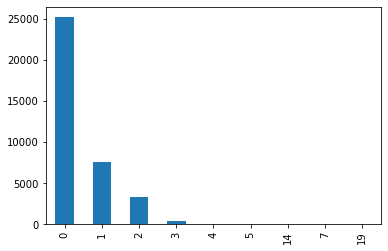

In [34]:
# 'child_num'; 대부분 0~2명 안에 분포
data['child_num'].value_counts().plot.bar()

In [35]:
# 3명부터는 그냥 2명으로 count
data.loc[data['child_num']>2, 'child_num'] = 2

# loc[행, 열]
# data['child_num']>2; 2명 초과인 행에 대해서
# 'child_num'; 'child_num'열의 값을 2로 지정해라

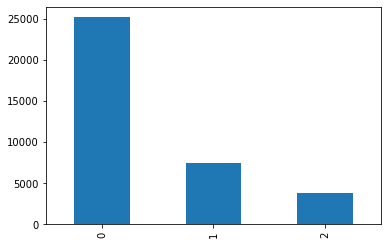

In [36]:
data['child_num'].value_counts().plot.bar()

In [37]:
data[group2].apply(lambda x: len(x.unique()))

child_num       3
credit          4
edu_type        5
family_size    10
family_type     5
house_type      6
income_type     5
dtype: int64

### 그 외 범주형 변수

In [38]:
# 레이블 인코딩 객체 생성
encoder = preprocessing.LabelEncoder()

In [39]:
# 범주형 변수 레이블 인코딩
data['income_type'] = encoder.fit_transform(data['income_type'])
data['edu_type'] = encoder.fit_transform(data['edu_type'])
data['family_type'] = encoder.fit_transform(data['family_type'])
data['house_type'] = encoder.fit_transform(data['house_type'])

In [40]:
# 레이블 인코딩 결과 확인
data[group2].head()

,child_num,credit,edu_type,family_size,family_type,house_type,income_type
0,0,1.0,1,2.0,1,2,0
1,1,1.0,4,3.0,0,1,0
2,0,2.0,1,2.0,1,1,4
3,0,0.0,4,2.0,1,1,0
4,0,2.0,1,2.0,1,1,2


## 데이터 인코딩 - group3

In [41]:
data[group3].head()

,DAYS_BIRTH,DAYS_EMPLOYED,begin_month,income_total,index
0,-13899,-4709,-6.0,202500.0,0
1,-11380,-1540,-5.0,247500.0,1
2,-19087,-4434,-22.0,450000.0,2
3,-15088,-2092,-37.0,202500.0,3
4,-15037,-2105,-26.0,157500.0,4


### income_total

In [42]:
# 요약 통계량 확인
data['income_total'].describe()

count    3.645700e+04
mean     1.866857e+05
std      1.017892e+05
min      2.700000e+04
25%      1.215000e+05
50%      1.575000e+05
75%      2.250000e+05
max      1.575000e+06
Name: income_total, dtype: float64

In [43]:
# *수치형 변수를 구간에 따라 범주형 변수로 인코딩
counts, bin_dividers = np.histogram(data['income_total'], bins=7)
data['income_total'] = pd.factorize(pd.cut(data['income_total'], bins=bin_dividers
                                          , include_lowest=True, labels=[i for i in range(7)]))[0]

# pd.factorize(); LabelEncoder와 유사한 방식으로 인코딩
# 2가지 값 반환; 1) 정수로 인코딩된 값, 2) 인코딩된 범주

cf. 파이썬 인코딩 관련: https://m.blog.naver.com/bosongmoon/221807518210

In [44]:
data['income_total'].head()

0    0
1    0
2    1
3    0
4    0
Name: income_total, dtype: int64

### *그 외 변수 인코딩

In [45]:
def make_bin(array, n):
    array = - array
    _, bin_dividers = np.histogram(array, bins = n)
    cut_categories = pd.cut(array, bin_dividers, labels = [i for i in range(n)], include_lowest=True)
    bined_array = pd.factorize(cut_categories)[0]
    return bined_array

# pd.cut; 동일 길이로 나누어서 범주 만들기

In [46]:
pd.Series(make_bin(data['DAYS_BIRTH'], 10)).value_counts()

0    5177
3    5015
1    4922
5    4248
4    4063
2    3934
8    3713
6    3252
9    1252
7     881
dtype: int64

In [47]:
data['DAYS_BIRTH'] = make_bin(data['DAYS_BIRTH'], 10)
data['DAYS_EMPLOYED'] = make_bin(data['DAYS_EMPLOYED'], 6)
data['begin_month'] = make_bin(data['begin_month'], 4)

In [48]:
data[group3].head()

,DAYS_BIRTH,DAYS_EMPLOYED,begin_month,income_total,index
0,0,0,0,0,0
1,1,0,0,0,1
2,2,0,1,1,2
3,3,0,2,0,3
4,3,0,1,0,4


## 데이터 다시 분리하기

In [49]:
# 전처리가 끝났으니 다시 train/test data로 나누기
print(train.shape)
print(test.shape)

(26457, 20)
(10000, 19)


In [50]:
train = data[:-10000] # 뒤에서 10000개 제외
test = data[-10000:] # 앞에서 10000개 제외

In [53]:
# cf. test는 y가 없음
train_X = train.drop('credit', axis=1, inplace=False)
train_y = train['credit']
test_X = test.drop('credit', axis=1, inplace=False)

In [54]:
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)

(26457, 18)
(26457,)
(10000, 18)


# 3. 모델링

## RandomForest

In [55]:
# 객체 생성
clf = RandomForestClassifier()

# 모델 학습
clf.fit(train_X, train_y)

# 모델 예측
proba = clf.predict_proba(train_X)

# 예측확률 확인
proba[:10]

array([[0.11, 0.68, 0.21],
       [0.07, 0.65, 0.28],
       [0.01, 0.11, 0.88],
       [0.78, 0.07, 0.15],
       [0.18, 0.02, 0.8 ],
       [0.03, 0.84, 0.13],
       [0.04, 0.03, 0.93],
       [0.67, 0.13, 0.2 ],
       [0.06, 0.  , 0.94],
       [0.07, 0.09, 0.84]])

In [56]:
np.argmax(proba, axis=1)[:10]

array([1, 1, 2, 0, 2, 1, 2, 0, 2, 2], dtype=int64)

# 4. For Submission

In [57]:
sample_submission.iloc[:,1:] = clf.predict_proba(test_X)

In [58]:
sample_submission.head()

,index,0,1,2
0,26457,0.12,0.09,0.79
1,26458,0.11,0.32,0.57
2,26459,0.06,0.20,0.74
3,26460,0.07,0.25,0.68
4,26461,0.05,0.33,0.62


In [79]:
sample_submission.to_csv("_sub_baseline.csv", index=False)

# + 모델 검증 및 평가

In [60]:
# train/test set 분리
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_X, train_y, stratify=train_y, test_size=0.25, random_state=10086)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(19842, 18) (6615, 18) (19842,) (6615,)


In [61]:
# 모델 학습
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [62]:
# 예측확률
y_proba = clf.predict_proba(X_val)
y_proba

array([[0.12, 0.39, 0.49],
       [0.05, 0.14, 0.81],
       [0.14, 0.06, 0.8 ],
       ...,
       [0.08, 0.09, 0.83],
       [0.02, 0.2 , 0.78],
       [0.1 , 0.26, 0.64]])

In [63]:
# 예측값
y_val_onehot = pd.get_dummies(y_val)
y_val_onehot.head()

,0.0,1.0,2.0
36,0,0,1
3464,0,0,1
2640,0,0,1
22500,0,1,0
17275,0,1,0


In [64]:
# log_loss 확인
from sklearn.metrics import log_loss
log_loss(y_val_onehot, y_proba)

1.0469958541704212

In [65]:
# StratifiedKFold 진행
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=55)

In [72]:
outcomes = []
for n_fold, (train_index, val_index)  in enumerate(folds.split(train_X, train_y)):
    X_train, X_val = train_X.iloc[train_index], train_X.iloc[val_index]
    y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    predictions = clf.predict_proba(X_val)
    y_val_onehot = pd.get_dummies(y_val)

    logloss = log_loss(y_val_onehot, predictions)
    outcomes.append(logloss)
    
np.mean(outcomes)

1.0596328889068243

In [74]:
outcomes = []
sub = np.zeros((test_X.shape[0],3))
for n_fold, (train_index, val_index)  in enumerate(folds.split(train_X, train_y)):
    X_train, X_val = train_X.iloc[train_index], train_X.iloc[val_index]
    y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    predictions = clf.predict_proba(X_val)
    y_val_onehot = pd.get_dummies(y_val)

    sub += clf.predict_proba(test_X)

    logloss = log_loss(y_val_onehot, predictions)
    outcomes.append(logloss)

sub = sub / 5
   
np.mean(outcomes)

1.0527792396134086

In [75]:
sub

array([[0.112, 0.186, 0.702],
       [0.088, 0.292, 0.62 ],
       [0.08 , 0.232, 0.688],
       ...,
       [0.072, 0.148, 0.78 ],
       [0.112, 0.358, 0.53 ],
       [0.092, 0.366, 0.542]])

In [76]:
sample_submission.iloc[:,1:] =  sub

In [78]:
sample_submission.to_csv("_sub_5fold.csv", index = False)